# Introduction (Unit I) - Paola

## 1.- Import data

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Load data from csv and store it in dataframe
data = pd.read_csv("HCV-Egy-Data.csv") #We can change this database

# We show the first 
data.head() # Return the first n rows.

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


## 2.- Data set description - "Hepatitis C Virus (HCV) for Egyptian patients" 

Egyptian patients who underwent treatment dosages for HCV about 18 months. Discretization should be applied based on expert recommendations; there is an attached file shows how.



*Age: Age
*Gender Gender
*BMI Body Mass Index
Fever Fever
Nausea/Vomting Nausea/Vomting
Headache Headache
Diarrhea Diarrhea
Fatigue & generalized bone ache Fatigue & generalized bone ache
Jaundice Jaundice
Epigastric pain Epigastric pain
WBC White blood cell
RBC red blood cells
HGB Hemoglobin
Plat Platelets
AST 1 aspartate transaminase ratio
ALT 1 alanine transaminase ratio 1 week
ALT 4 alanine transaminase ratio 12 weeks
ALT 12 alanine transaminase ratio 4 weeks
ALT 24 alanine transaminase ratio 24 weeks
ALT 36 alanine transaminase ratio 36 weeks
ALT 48 alanine transaminase ratio 48 weeks
ALT after 24 w alanine transaminase ratio 24 weeks
RNA Base RNA Base
RNA 4 RNA 4
RNA 12 RNA 12
RNA EOT RNA end-of-treatment
RNA EF RNA Elongation Factor
Baseline histological Grading Baseline histological Grading
Baselinehistological staging Baselinehistological staging

#### a) We indicate the type each variable is (numerical, categorical, etc.).

In [3]:
data.dtypes

Age                                 int64
Gender                              int64
BMI                                 int64
Fever                               int64
Nausea/Vomting                      int64
Headache                            int64
Diarrhea                            int64
Fatigue & generalized bone ache     int64
Jaundice                            int64
Epigastric pain                     int64
WBC                                 int64
RBC                                 int64
HGB                                 int64
Plat                                int64
AST 1                               int64
ALT 1                               int64
ALT4                                int64
ALT 12                              int64
ALT 24                              int64
ALT 36                              int64
ALT 48                              int64
ALT after 24 w                      int64
RNA Base                            int64
RNA 4                             

#### b) Columns name

In [63]:
data.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue&generalizedboneache', 'Jaundice', 'Epigastricpain',
       'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 'ALT24',
       'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT',
       'RNAEF', 'BaselinehistologicalGrading', 'Baselinehistologicalstaging',
       'Histologicalstaging', 'Outcome'],
      dtype='object')

#### c) Removing column blank spaces

In [67]:
columns = data.columns.str.replace(' ', '')
raw_headers = columns
headers = [str(x) for x in raw_headers]
print(headers)

['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache', 'Diarrhea', 'Fatigue&generalizedboneache', 'Jaundice', 'Epigastricpain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 'ALT24', 'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT', 'RNAEF', 'BaselinehistologicalGrading', 'Baselinehistologicalstaging', 'Histologicalstaging', 'Outcome']


#### d) Adding two categorical variables (from 'Baselinehistologicalstaging')
The new variable 'Outcome' indicates whether the patient has Cirrhosis or not (1 or 0) and 'Histologicalstaging' that indicates the histological stage of the disease.

In [6]:
category=pd.cut(data.Baselinehistologicalstaging, right=False
                ,bins=[0,1,2,3,4,5],labels=['NoFibrosis','PortalFibrosis','FewSepta','ManySepta','Cirrhosis'])
data.insert(29,'Histologicalstaging', category)
data.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue&generalizedboneache', 'Jaundice', 'Epigastricpain',
       'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 'ALT24',
       'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT',
       'RNAEF', 'BaselinehistologicalGrading', 'Baselinehistologicalstaging',
       'Histologicalstaging'],
      dtype='object')

In [7]:
new_var= np.where((data['Baselinehistologicalstaging'] < 4), 0,1)
data.insert(30,'Outcome', new_var) # In the 8th position.
data.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue&generalizedboneache', 'Jaundice', 'Epigastricpain',
       'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 'ALT24',
       'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT',
       'RNAEF', 'BaselinehistologicalGrading', 'Baselinehistologicalstaging',
       'Histologicalstaging', 'Outcome'],
      dtype='object')

In [8]:
data.dtypes

Age                               int64
Gender                            int64
BMI                               int64
Fever                             int64
Nausea/Vomting                    int64
Headache                          int64
Diarrhea                          int64
Fatigue&generalizedboneache       int64
Jaundice                          int64
Epigastricpain                    int64
WBC                               int64
RBC                               int64
HGB                               int64
Plat                              int64
AST1                              int64
ALT1                              int64
ALT4                              int64
ALT12                             int64
ALT24                             int64
ALT36                             int64
ALT48                             int64
ALTafter24w                       int64
RNABase                           int64
RNA4                              int64
RNA12                             int64


In [9]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Histologicalstaging,Outcome
0,56,1,35,2,1,1,1,2,2,2,...,5,655330,634536,288194,5,5,13,2,FewSepta,0
1,46,1,29,1,2,2,1,2,2,1,...,44,40620,538635,637056,336804,31085,4,2,FewSepta,0
2,57,1,33,2,2,2,2,1,1,1,...,5,571148,661346,5,735945,558829,4,4,Cirrhosis,1
3,49,2,33,1,2,1,2,1,2,1,...,33,1041941,449939,585688,744463,582301,10,3,ManySepta,0
4,59,1,32,1,1,2,1,2,2,2,...,30,660410,738756,3731527,338946,242861,11,1,PortalFibrosis,0


## 3.- Descriptive Statistical Analysis

In [10]:
# Describe data
data.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Outcome
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462,0.261372
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392,0.439541
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000,0.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000,0.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000,0.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000,1.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000,1.000000


In [11]:
data.describe(include='all') #For categorical data.

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Histologicalstaging,Outcome
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000,1385,1385.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cirrhosis,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362,NaN
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462,NaN,0.261372
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392,NaN,0.439541
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000,NaN,0.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000,NaN,0.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000,NaN,0.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000,NaN,1.000000


In [12]:
# Number of entries in the dataset:
print(data.shape)

(1385, 31)


In [13]:
# Total number of unique values per variable
print(data.nunique())

Age                              30
Gender                            2
BMI                              14
Fever                             2
Nausea/Vomting                    2
Headache                          2
Diarrhea                          2
Fatigue&generalizedboneache       2
Jaundice                          2
Epigastricpain                    2
WBC                            1305
RBC                            1384
HGB                               6
Plat                           1375
AST1                             90
ALT1                             90
ALT4                             90
ALT12                            90
ALT24                            90
ALT36                            91
ALT48                            91
ALTafter24w                      25
RNABase                        1384
RNA4                           1384
RNA12                          1001
RNAEOT                         1002
RNAEF                          1004
BaselinehistologicalGrading 

In [14]:
data["Outcome"].value_counts() 

0    1023
1     362
Name: Outcome, dtype: int64

In [15]:
data["BaselinehistologicalGrading"].value_counts()

15    139
11    121
14    106
9     103
6     102
12    101
8      97
13     95
4      94
5      93
3      89
10     87
16     86
7      72
Name: BaselinehistologicalGrading, dtype: int64

In [16]:
data["Baselinehistologicalstaging"].value_counts()

4    362
3    355
1    336
2    332
Name: Baselinehistologicalstaging, dtype: int64

## 4.- Analyzing Feature Patterns using Visualization

a) Visualize the histograms of the variables in the database, choosing a number of intervals suitable for each variable. Justify this choice.

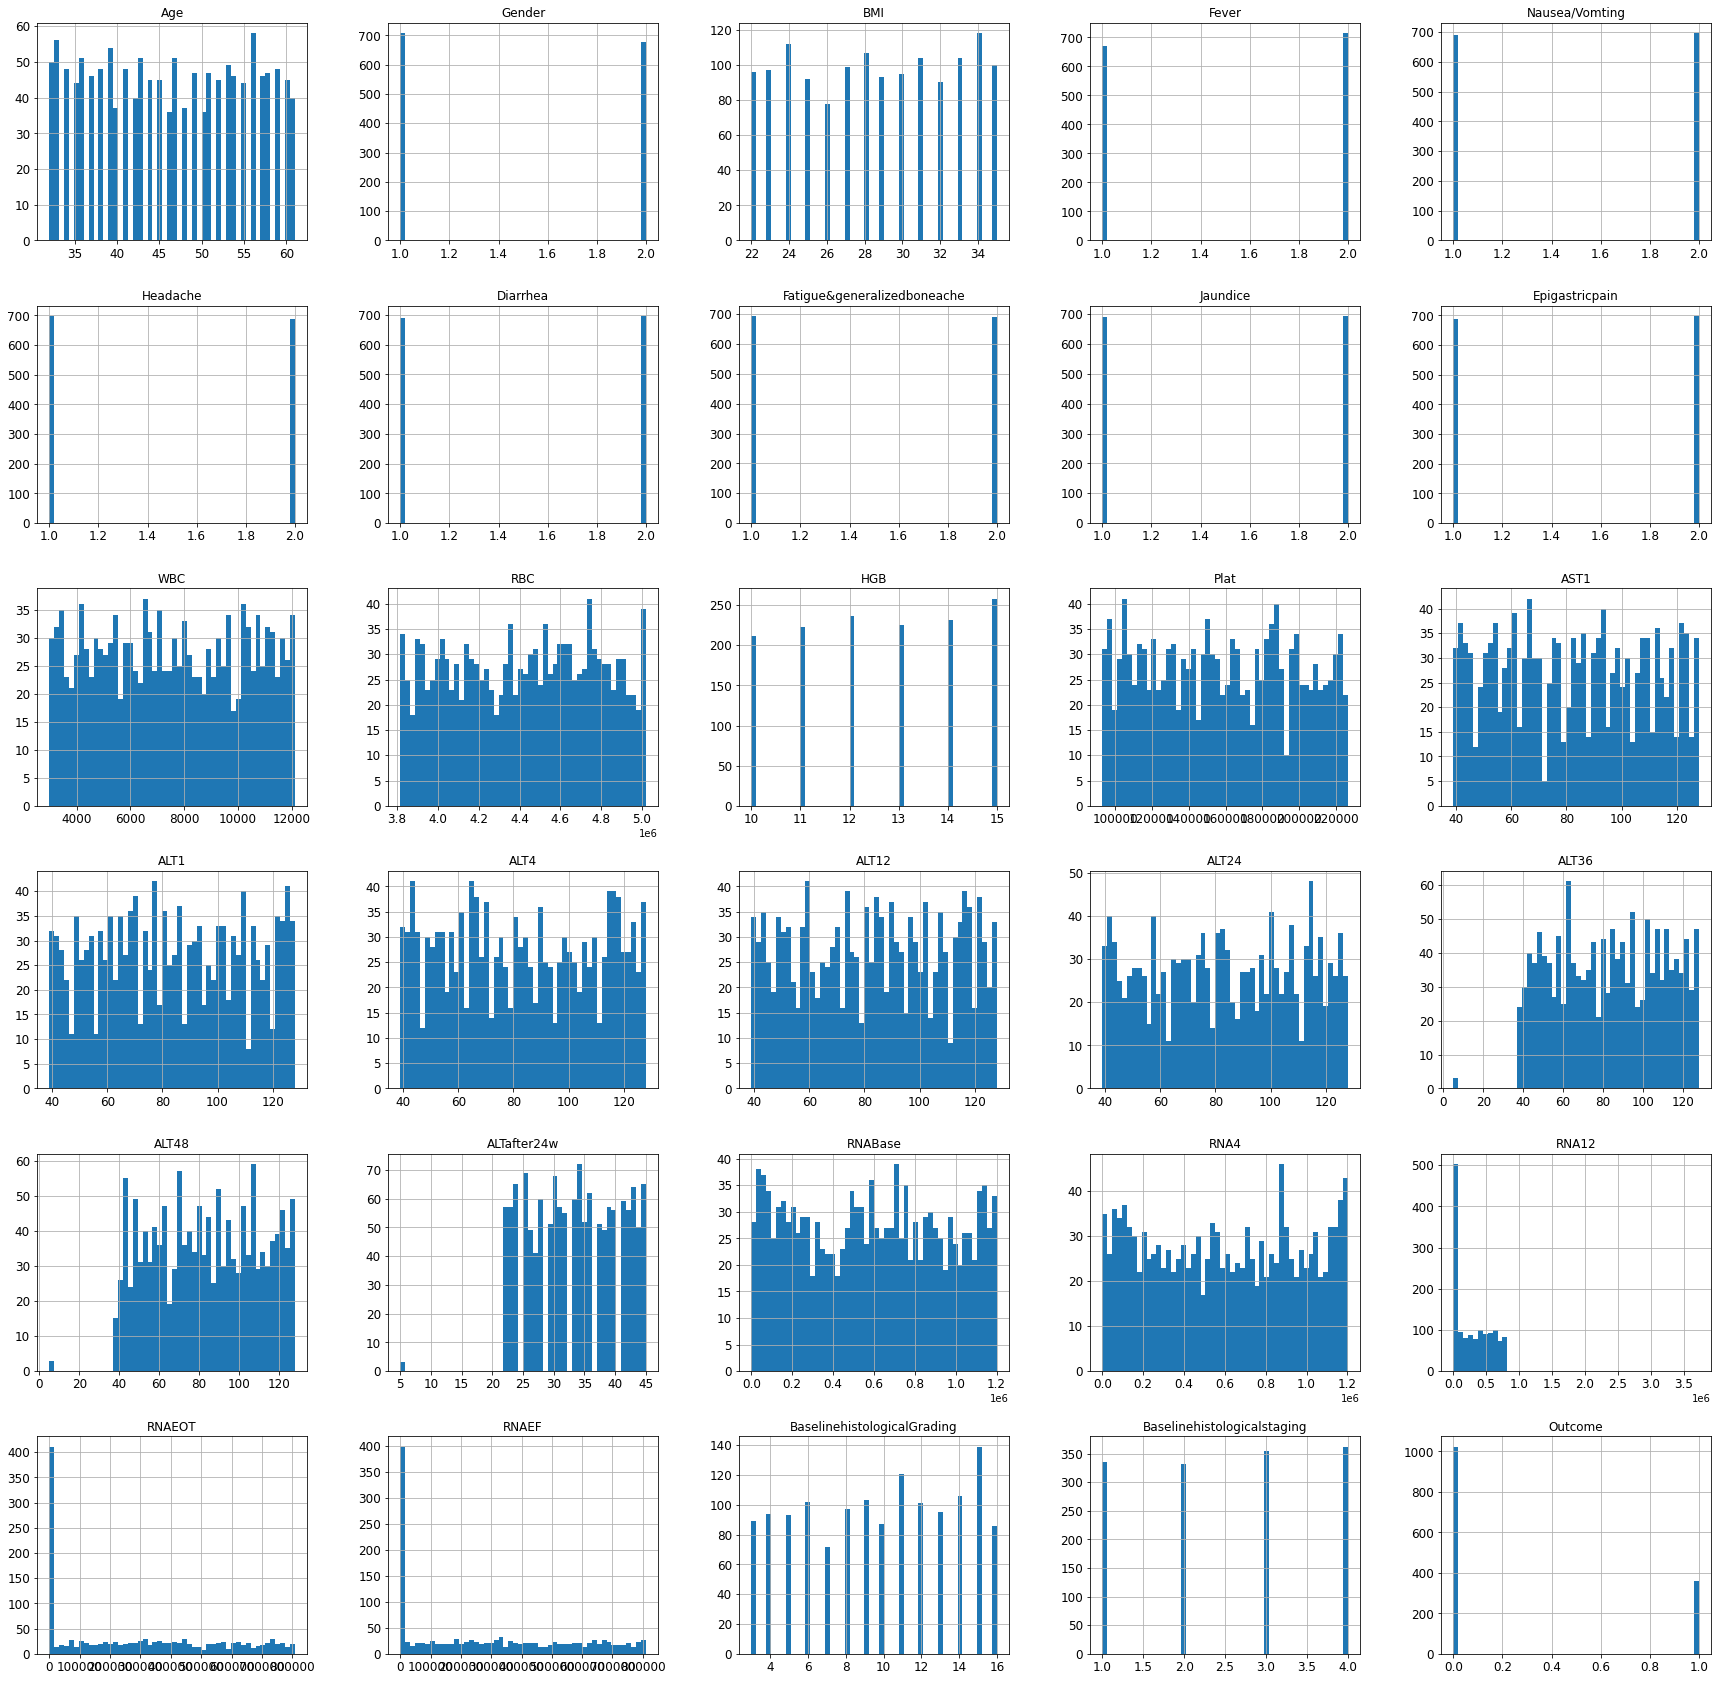

In [36]:
data.hist(figsize=(30, 30), bins=50, xlabelsize=12, ylabelsize=12);

In [130]:
#data.plot(kind='hist',subplots=True, layout=(3,10),  figsize=(12,12))
#plt.show()

In the histogram below, we can see how the database is well distributed in what concerns about the number of samples in each Histological Staging ('PortalFibrosis', 'FewSepta', 'ManySepta', 'Cirrhosis').

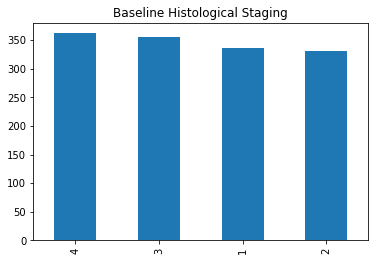

In [38]:
data['Baselinehistologicalstaging'].value_counts().plot.bar(title="Baseline Histological Staging"); #Add axis labels

It can be easily seen that the database.

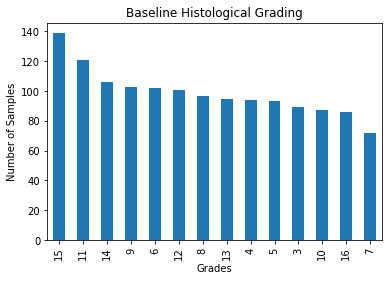

In [47]:
data['BaselinehistologicalGrading'].value_counts().plot.bar(title="Baseline Histological Grading", 
                                                            xlabel = 'Grades', ylabel = 'Number of Samples'); #Add axis labels

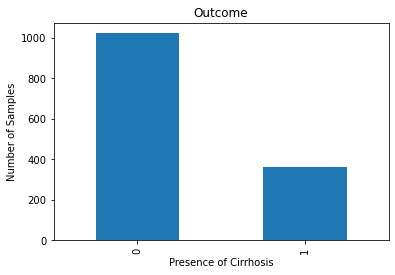

In [49]:
data['Outcome'].value_counts().plot.bar(title="Outcome", xlabel = 'Presence of Cirrhosis', ylabel = 'Number of Samples');

b) Plotting Boxplots

In [132]:
def print_boxplots_hist(headers, data):
    
    #mu = np.mean(x)
    #sigma = np.std(x, ddof = 1) # unbiased std
    
    
    for header in headers:
        
        x = data[header]
        
        # Try to avoid categorical variables to enter into the boxplot code.
        init_value = x[0]
        
        try:
            trial = float(init_value)
            plt.figure(figsize = (20,4))
            ax1 = plt.subplot(1,2,1)
            ax1.hist(x, bins=70)
            ax1.set_title('Histogram for ' + header)

            ax2 = plt.subplot(1,2,2)
            ax2.boxplot(x)
            ax2.set_title('Boxplot for '+ header)
            plt.show()
        except:
            ax1 = plt.subplot(1,1,1)
            ax1.hist(x, bins=70)
            ax1.set_title('Histogram for ' + header)
            sns.catplot(x='Histologicalstaging', y="BaselinehistologicalGrading", kind="box", data=data, hue = 'Outcome')
            #set_title('Boxplot for '+ header)
            plt.show()
        

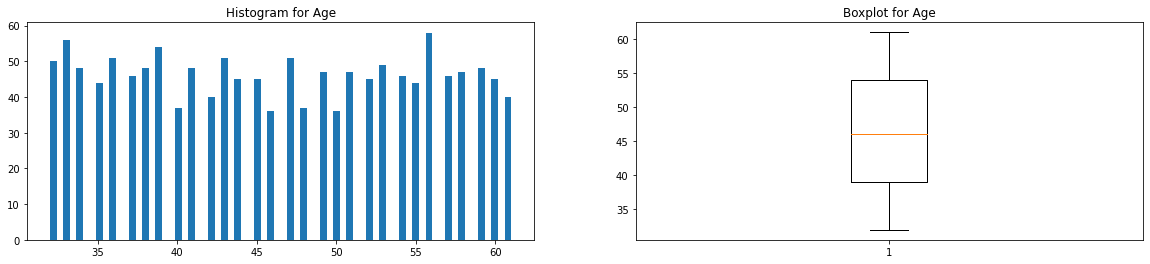

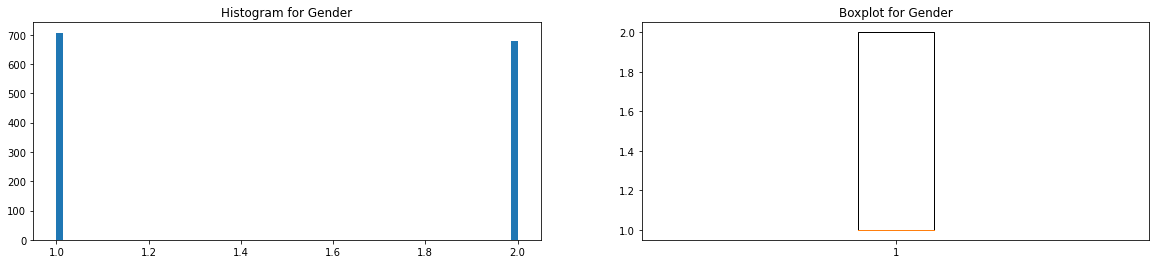

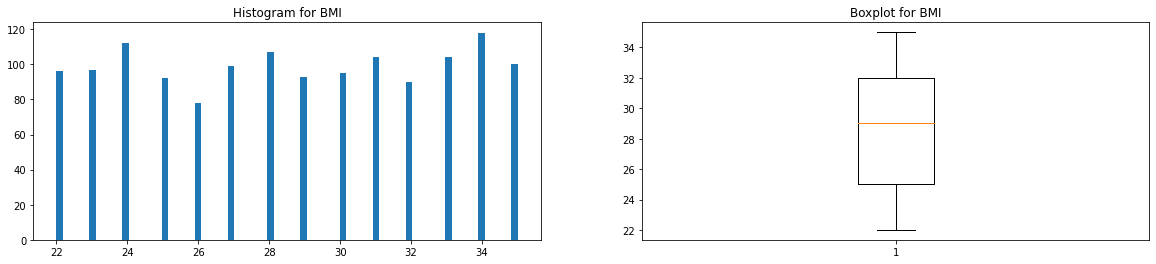

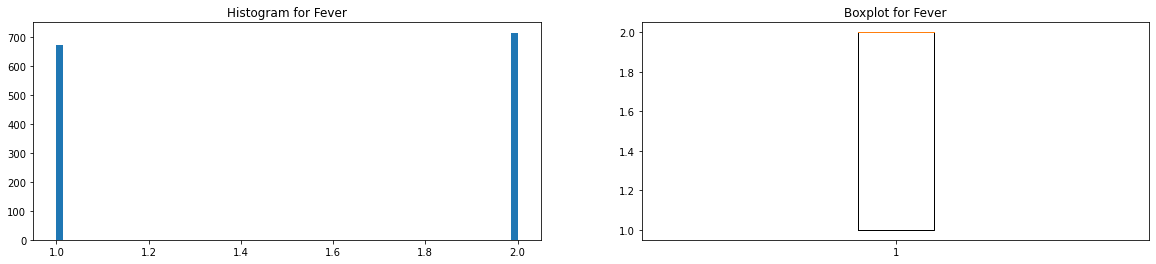

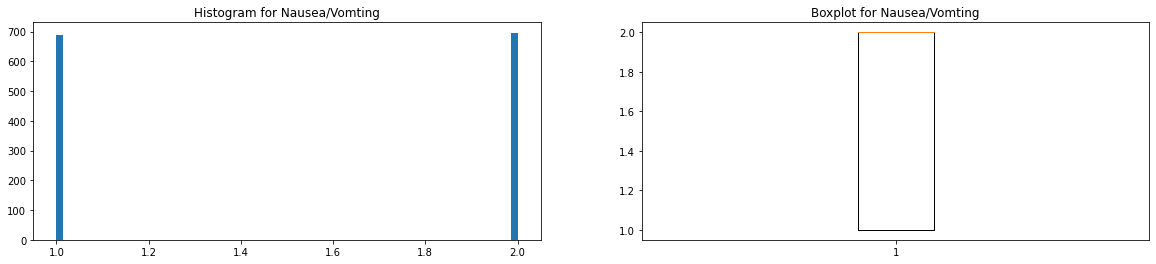

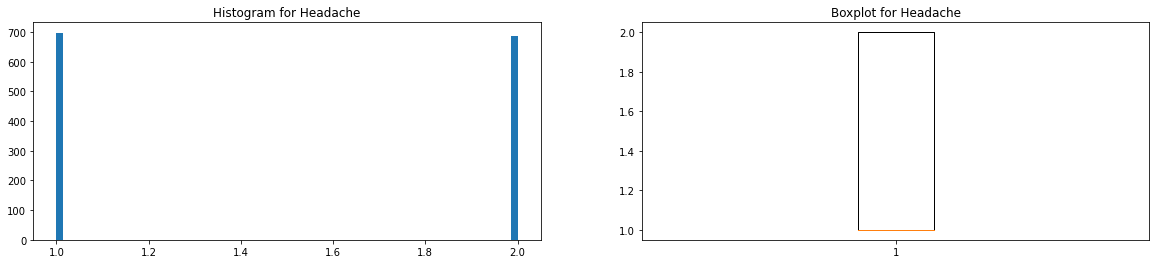

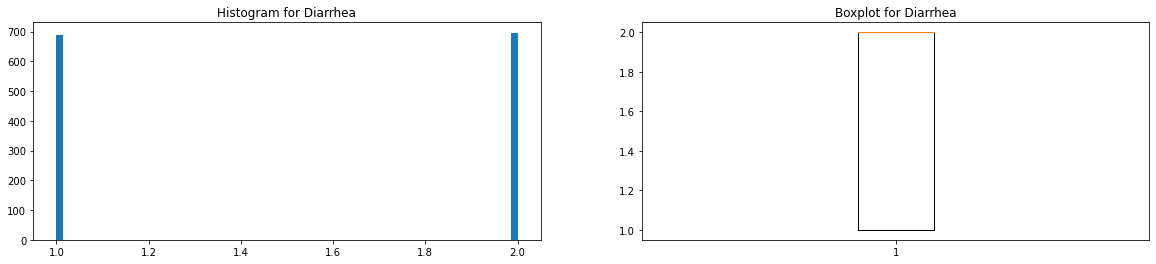

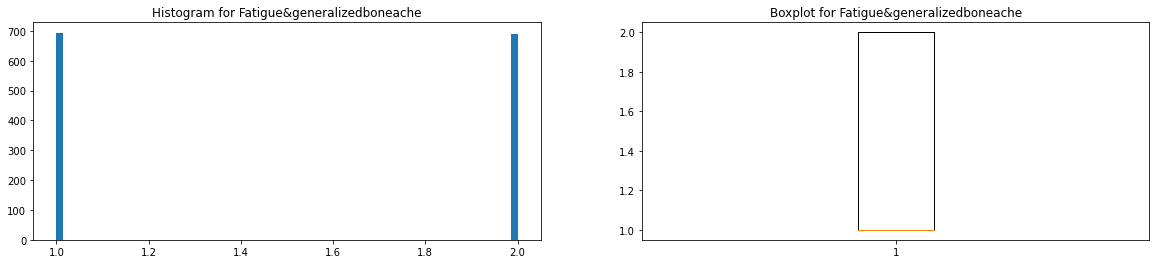

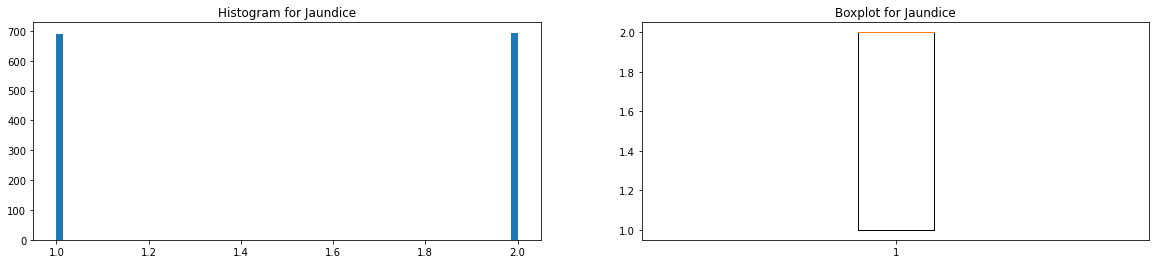

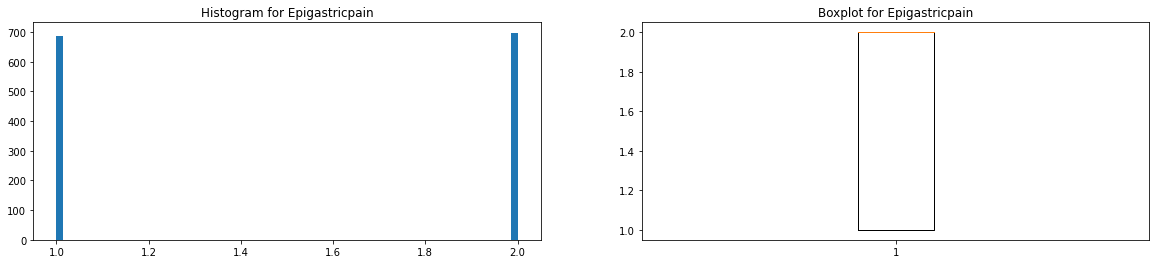

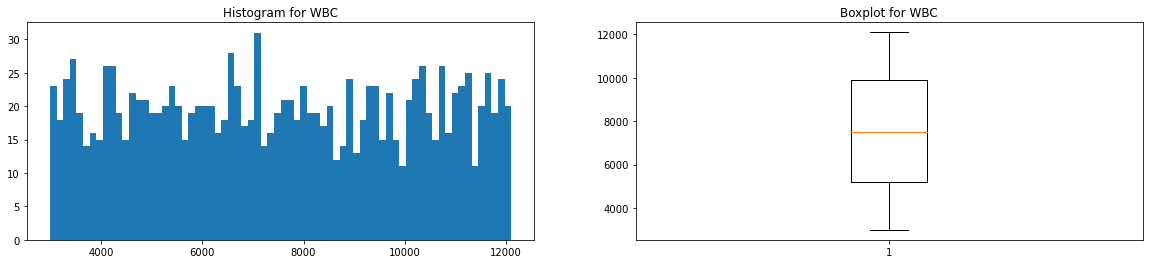

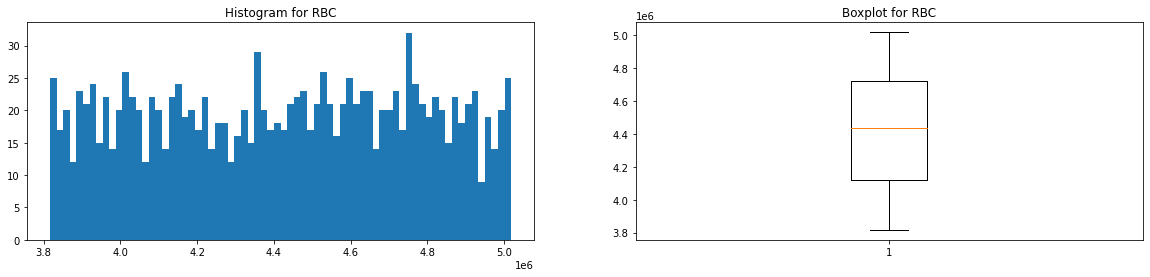

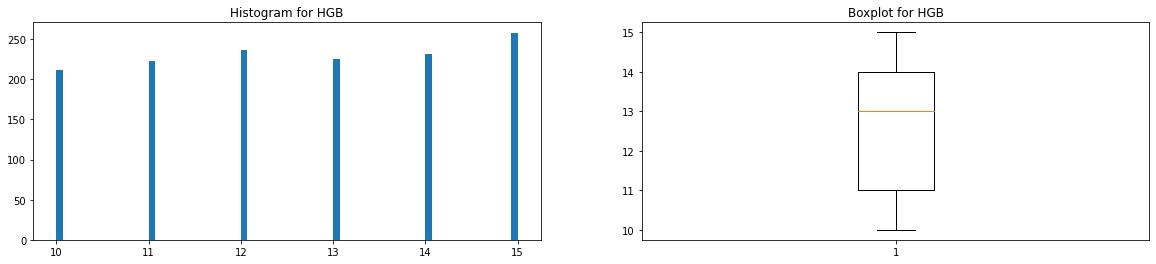

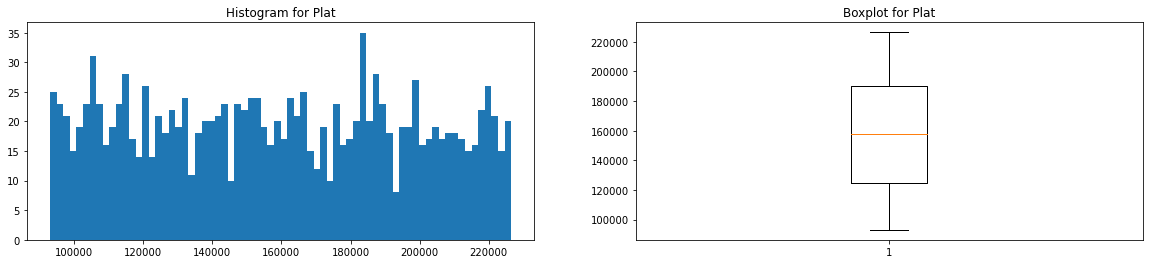

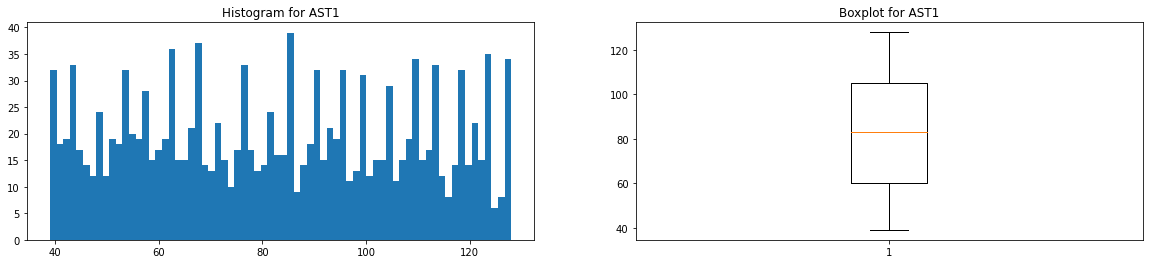

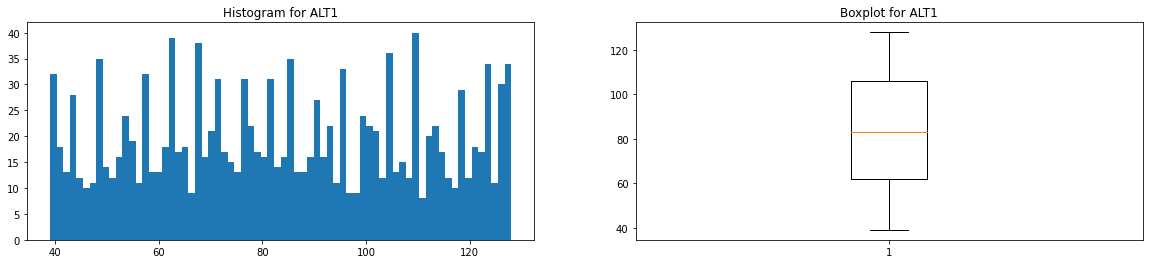

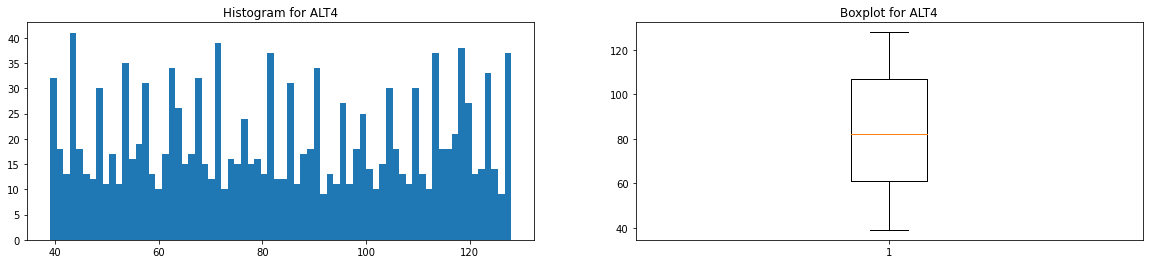

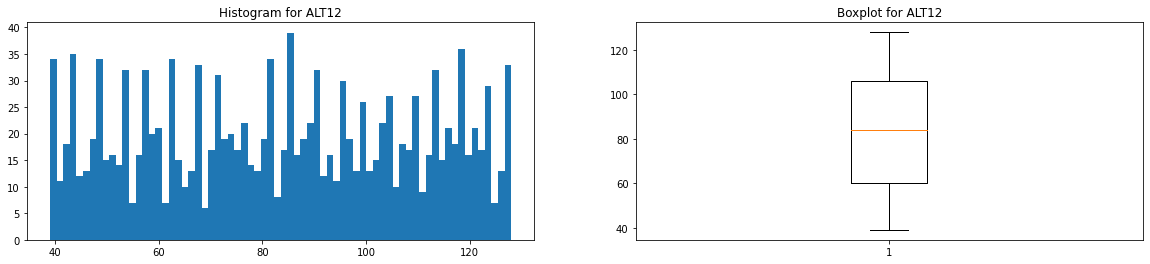

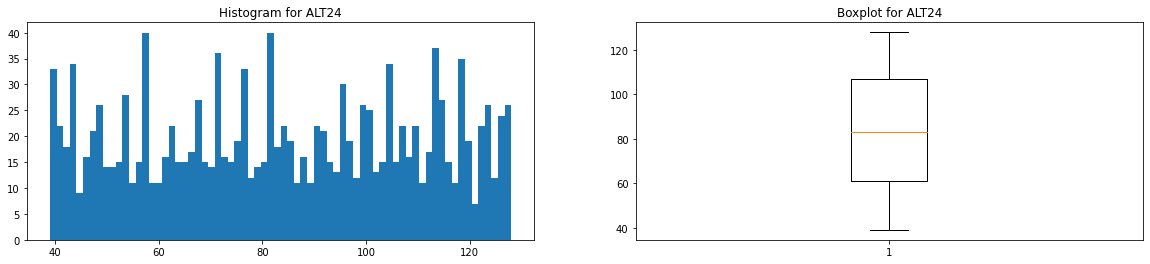

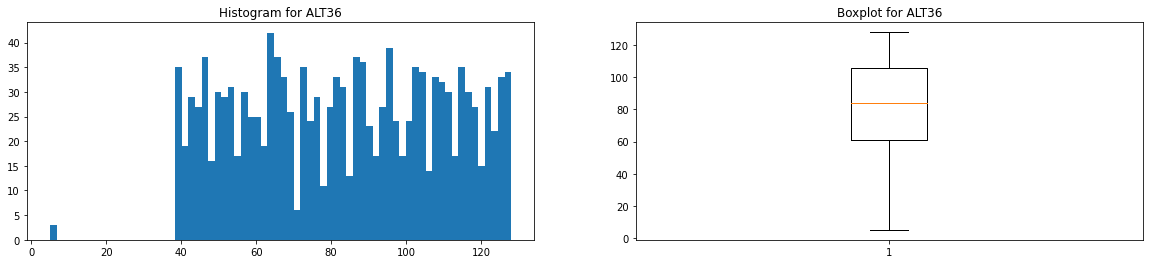

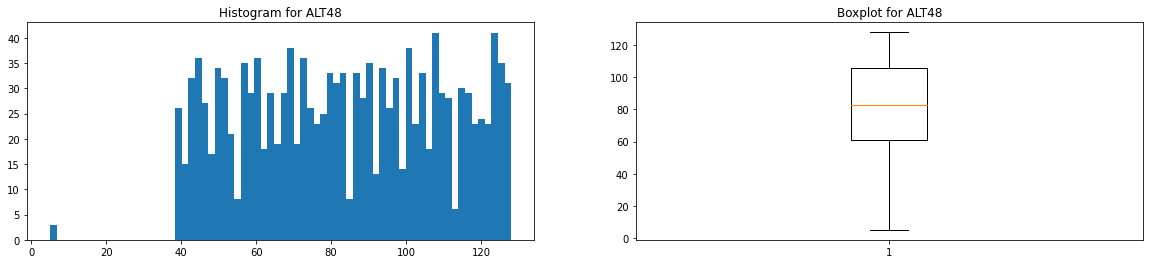

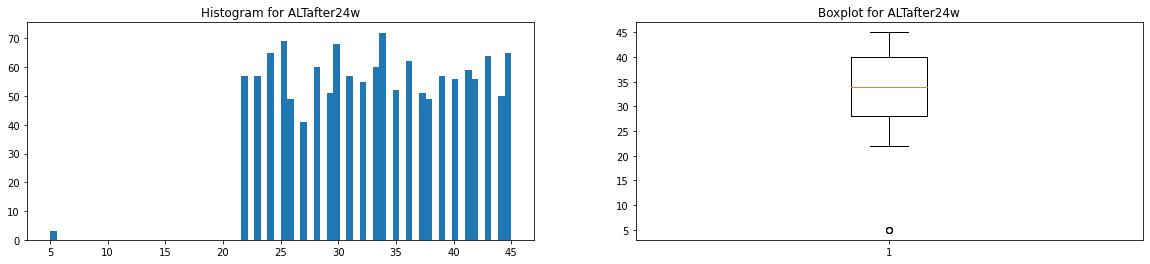

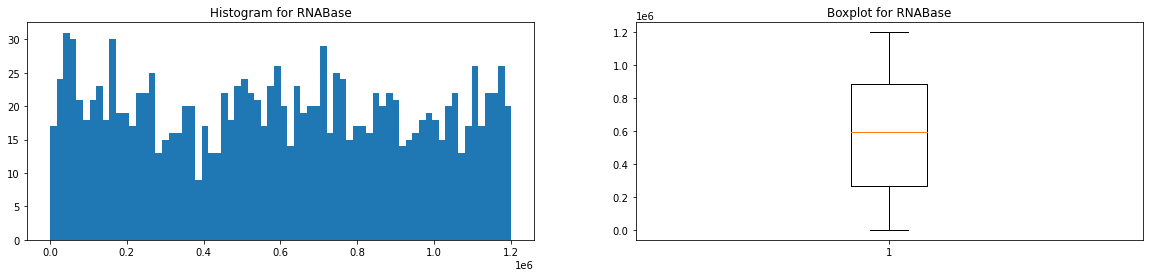

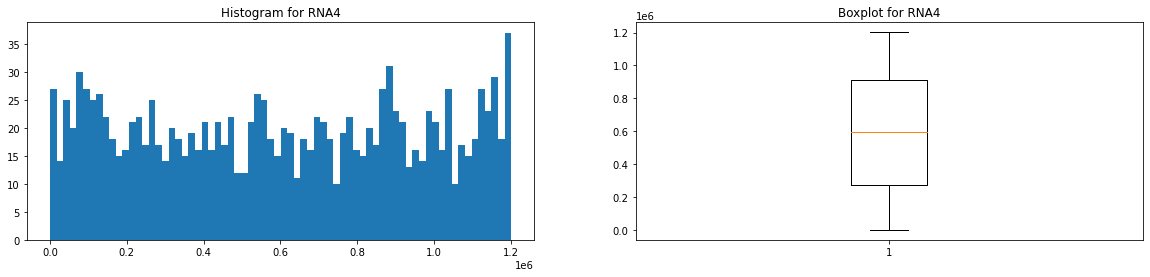

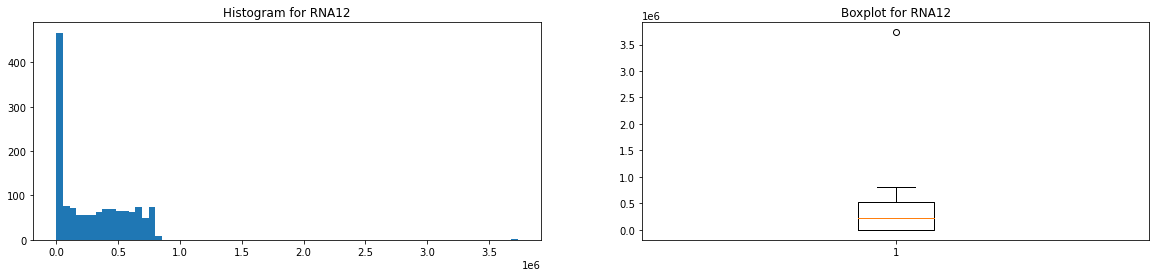

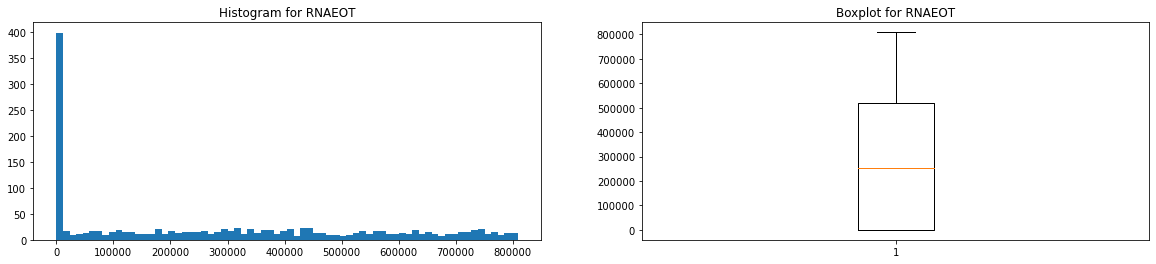

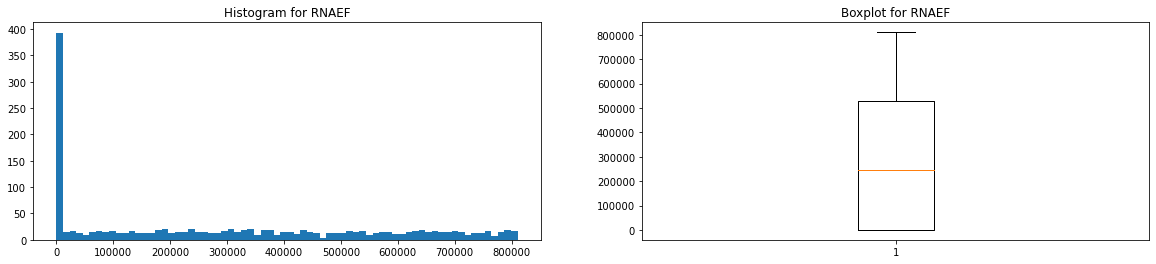

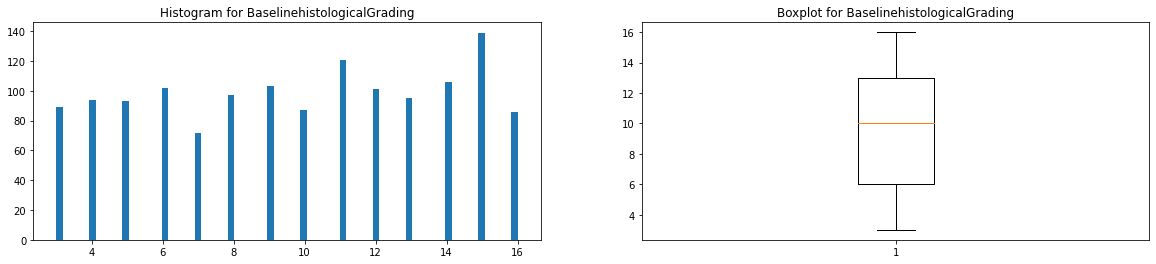

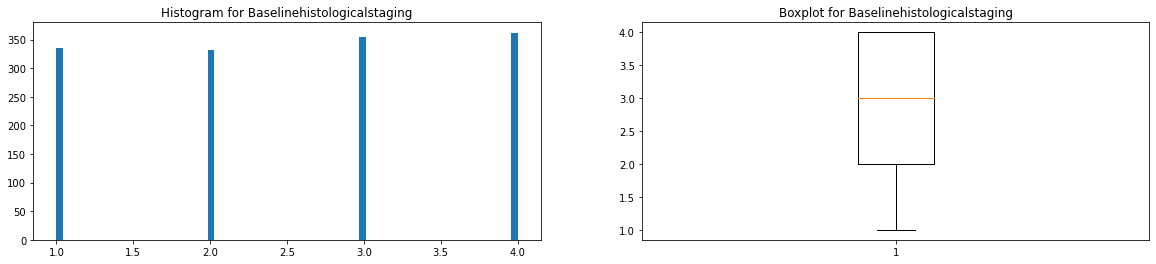

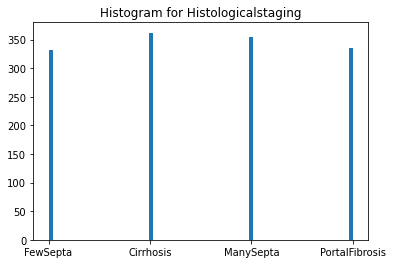

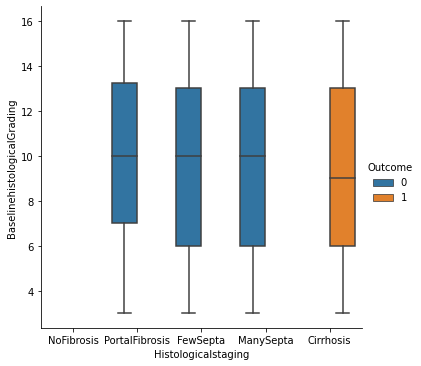

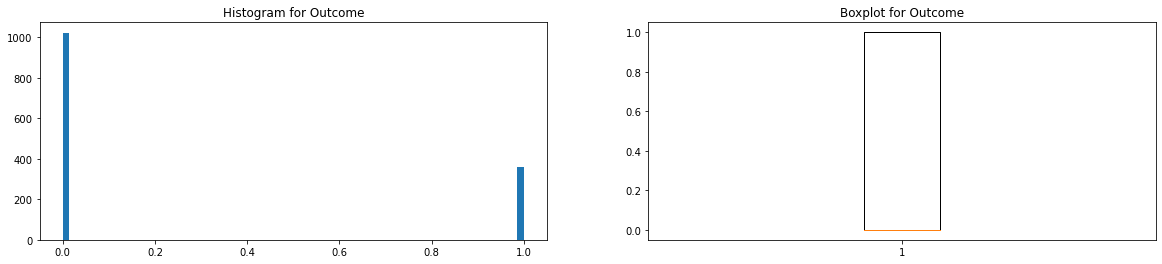

In [133]:
#boxplot = data.boxplot(grid=True, rot=60, fontsize=8)
print_boxplots_hist(headers, data)

In [131]:
#data.plot(kind='box',subplots=True, layout=(6,10), sharex=False, sharey=False, figsize=(8,8))
#plt.show()